# Adult Income Exploratory Analysis

The objective of this analysis is to uderstand the factors that may be influencing the inconme distribution on a sample of a population in the United States. 
We would like to explore the characteristics of the sample by diferent levels of income. This database separates the population in two groups, people with income less than 50K and people that earn more than 50k.


The variables that this analysis take in to consideration are:
- age               
- workclass        
- fnlwgt      
- education        
- educational-num   
- marital-status   
- occupation       
- relationship     
- race             
- gender           
- capital-gain     
- capital-loss     
- hours-per-week    
- native-country 
- income

Packages used:

In [6]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from ipywidgets import widgets
import pandas as pd
import numpy as np
import plotly.offline as pyo



import seaborn as sns 
import joypy

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

In [7]:
adult=pd.read_csv('adult.csv')

In [8]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We can see that there are no null values in the data base. We need to further invertigate if thre are other charaters that describe missing values.

In [10]:
adult.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [11]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


We can see that the data base has the character '?'. I proceed to replace it for NaN values and remove it the rows that have this missing values.

In [12]:
df=adult.copy()

In [13]:
df=df.replace(['?'],np.nan)

In [14]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
occupation,0.057512
workclass,0.057307
native-country,0.017546


In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
df[df!= 'Nan']

/Users/jose1/opt/anaconda3/envs/DataCamp/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
#Remove all the rows that contain 'NaN' 
df=df[~df.stack().str.contains('NaN').any(level=0)]

In [18]:
df =df.drop(['fnlwgt'],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.6+ MB


# Exploratory Data Analysis.

In the following chart, we can see that there is a significant difference between the people that earn more than 50K and the one that earn less than 50K in terms of number of years spent on education. As well as in the hours per week worked. 
We can also see that for Capital gain the people that earn more than 50K has higher values than the people that earn less. Whereas for capital loss people that earn less than 50k present more than the ones that earn more.

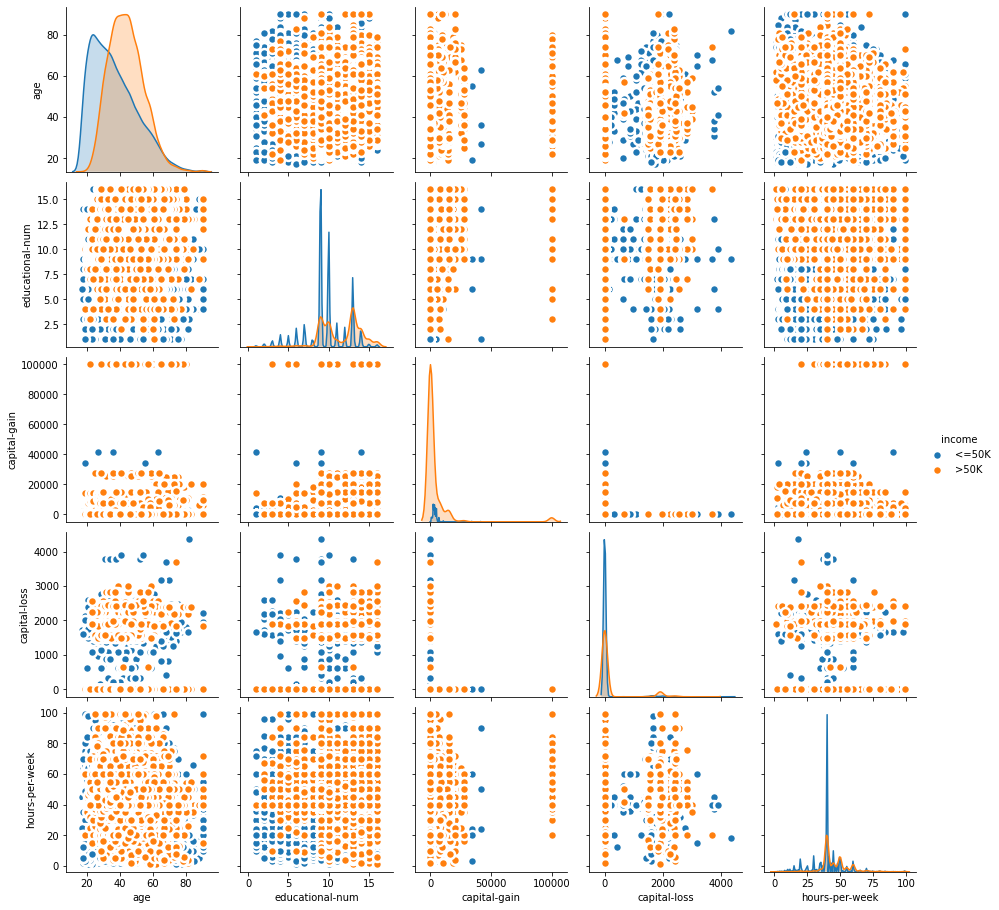

In [35]:
sns.pairplot(df, kind="scatter", hue="income", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

We can also see that the sample is balance by age and that the number of years spent on education have a diferent distribution depending of the race.

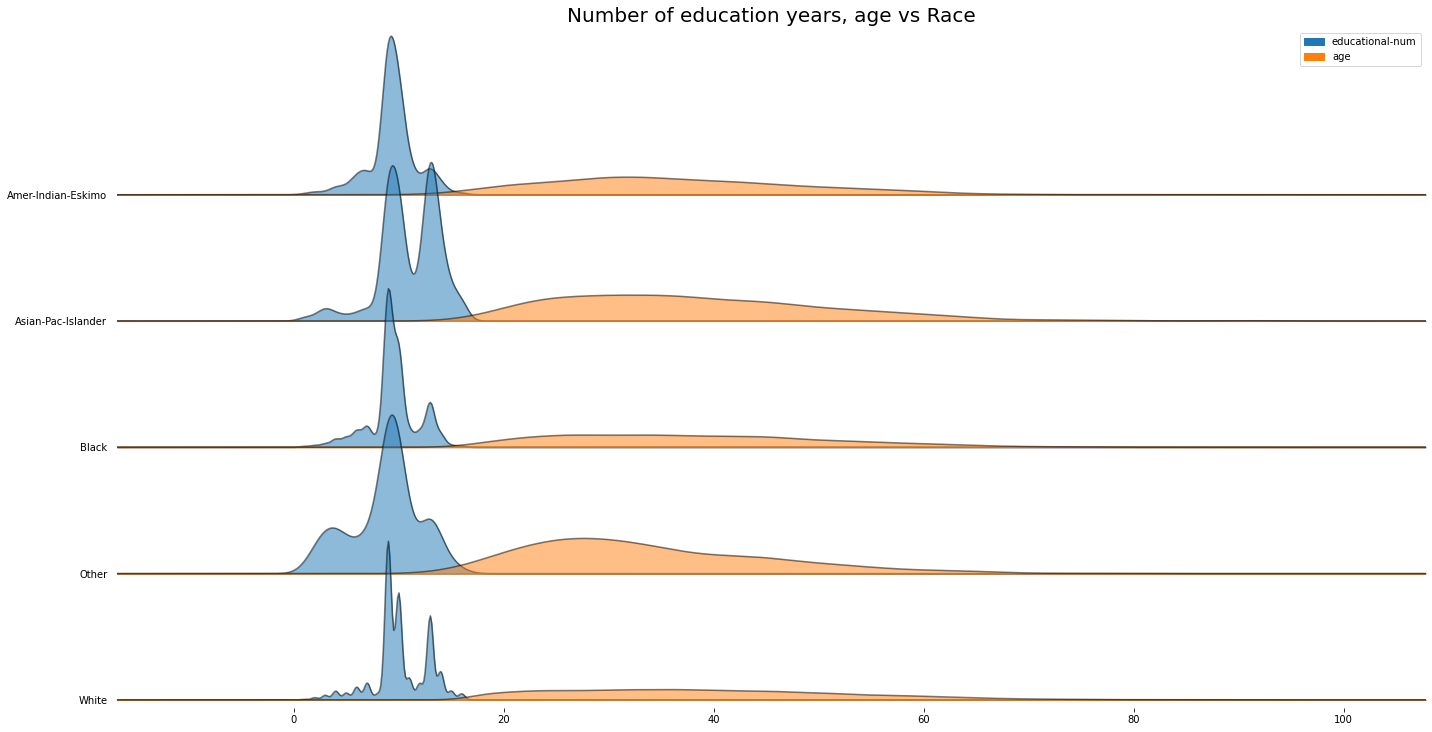

In [41]:
fig, axes = joypy.joyplot(df,
                         column = ['educational-num','age'],
                         by = 'race',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.5, 
                         legend = True)

plt.title('Number of education years, age vs Race', fontsize = 20)
plt.show()

In the following pivot table we can see the distribution of income by ocupation.

In [42]:
#With this function as it is the settings of the pivot table are lost if I refresh the file.
from pivottablejs import pivot_ui
pivot_ui(df)

In [20]:
#with the followong function the settings of the pivot table will be saved even if I refresh the file.
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
import json, io

TEMPLATE = u"""
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>PivotTable.js</title>

        <!-- external libs from cdnjs -->
        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.11.2/jquery.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery-csv/0.71/jquery.csv-0.71.min.js"></script>


        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/d3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/c3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/export_renderers.min.js"></script>

        <style>
            body {font-family: Verdana;}
            .node {
              border: solid 1px white;
              font: 10px sans-serif;
              line-height: 12px;
              overflow: hidden;
              position: absolute;
              text-indent: 2px;
            }
            .c3-line, .c3-focused {stroke-width: 3px !important;}
            .c3-bar {stroke: white !important; stroke-width: 1;}
            .c3 text { font-size: 12px; color: grey;}
            .tick line {stroke: white;}
            .c3-axis path {stroke: grey;}
            .c3-circle { opacity: 1 !important; }
            .c3-xgrid-focus {visibility: hidden !important;}
        </style>
    </head>
    <body>
        <script type="text/javascript">
            $(function(){

                $("#output").pivotUI(
                    $.csv.toArrays($("#output").text())
                    , $.extend({
                        renderers: $.extend(
                            $.pivotUtilities.renderers,
                            $.pivotUtilities.c3_renderers,
                            $.pivotUtilities.d3_renderers,
                            $.pivotUtilities.export_renderers
                            ),
                        hiddenAttributes: [""]
                    } 
                    , {
                        onRefresh: function(config) {
                            var config_copy = JSON.parse(JSON.stringify(config));
                            //delete some values which are functions
                            delete config_copy["aggregators"];
                            delete config_copy["renderers"];
                            //delete some bulky default values
                            delete config_copy["rendererOptions"];
                            delete config_copy["localeStrings"];
                            $("#output2").text(JSON.stringify(config_copy, undefined, 2));
                        }
                    }
                    , %(kwargs)s
                    , %(json_kwargs)s)
                ).show();
             });
        </script>
        <div id="output" style="display: none;">%(csv)s</div>

        <textarea id="output2"
        style="float: left; width: 0px; height: 0px; margin: 0px; opacity:0;" readonly>
        </textarea>

        <button onclick="copyTextFunction()">Copy settings</button>
        <script>
        function copyTextFunction() {
                    var copyText = document.getElementById("output2");
                    copyText.select();
                    document.execCommand("copy");
                    }
        </script>

    </body>
</html>
"""


def pivot_cht_ui(df, name, url="",
    width="100%", height="500",json_kwargs='',  **kwargs):
  print(name)
  outfile_path = name + '.html'
  with io.open(outfile_path, 'wt', encoding='utf8') as outfile:
      csv = df.to_csv(encoding='utf8')
      if hasattr(csv, 'decode'):
          csv = csv.decode('utf8')
      outfile.write(TEMPLATE %
            dict(csv=csv, kwargs=json.dumps(kwargs),json_kwargs=json_kwargs))
  
  return IFrame(src=url or outfile_path, width=width, height=height)

In [22]:
#Pivot table that will keep the formating even if the file gets closed.
#Pivot table of Income by Ocupation
pivot_cht_ui(df,name='Adult Income',json_kwargs="""
{
  "derivedAttributes": {},
  "hiddenAttributes": [
    ""
  ],
  "hiddenFromAggregators": [],
  "hiddenFromDragDrop": [],
  "menuLimit": 500,
  "cols": [
    "weeks"
  ],
  "rows": [],
  "vals": [
    "resurrected_90d"
  ],
  "rowOrder": "key_a_to_z",
  "colOrder": "key_a_to_z",
  "exclusions": {},
  "inclusions": {},
  "unusedAttrsVertical": 85,
  "autoSortUnusedAttrs": false,
  "sorters": {},
  "inclusionsInfo": {},
  "aggregatorName": "Average",
  "rendererName": "Line Chart"
}
""")

Adult Income


We can also see that the ocupation factor also shows a significant difference between the people that earn more than 50K and the ones that earn less. The categories where the difference between the groups is less are the Executive managerial positions and the profesional specialty.

In the following pivot table we can see the income by marital status.

In [43]:
from pivottablejs import pivot_ui
pivot_ui(df)

In [23]:
#Pivot table that will keep the formating even if the file gets closed.
#Pivot table of Income by Ocupation
pivot_cht_ui(df,name='Adult Income by marital status ',json_kwargs="""
{
  "derivedAttributes": {},
  "hiddenAttributes": [
    ""
  ],
  "hiddenFromAggregators": [],
  "hiddenFromDragDrop": [],
  "menuLimit": 500,
  "cols": [
    "weeks"
  ],
  "rows": [],
  "vals": [
    "resurrected_90d"
  ],
  "rowOrder": "key_a_to_z",
  "colOrder": "key_a_to_z",
  "exclusions": {},
  "inclusions": {},
  "unusedAttrsVertical": 85,
  "autoSortUnusedAttrs": false,
  "sorters": {},
  "inclusionsInfo": {},
  "aggregatorName": "Average",
  "rendererName": "Line Chart"
}
""")

Adult Income by marital status 


We can see that the marrried spouse category seems to concentrate the people that earn more than 50k. For the rest of the categories we see that the majority of the other categories are mostly represented by people that earn less than 50K. We can further investigate if a less stable household affects the income.

In the following char we can clearly see a diffence in income by gender in both income groups

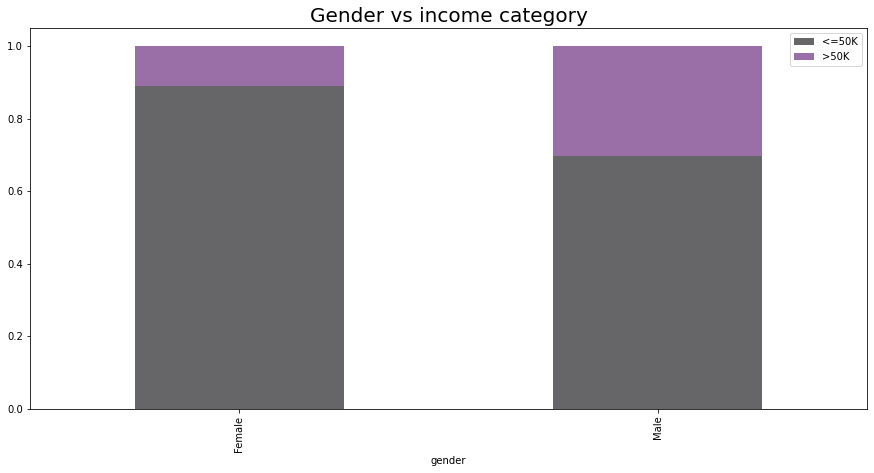

In [24]:
income_p = pd.crosstab(df['gender'], df['income'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
income_p.div(income_p.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors, alpha=.6)

plt.title('Gender vs income category', fontsize = 20)
plt.legend()
plt.show()

In summary we can see that race, ocupation, marital status and gender are features to consider when working on describing the characteristics of both income groups.
As we could see there are significant differences between the icome groups when we look at the data conditional on the features mentioned, it will be interesting to follow up and uderstand the order of importance of each this features when it comes to predict under which income group a person with this characteristisc is most likely to belong.
